## Projektarbete NBI - Analys av Housing 2024-01-01

#### Import libraries

In [57]:
# Importing Pandas. 
import pandas as pd
import matplotlib.pyplot as plt

#### Load the data set "houseing" through Pandas. 

In [9]:
house = pd.read_csv("housing.csv")


#### Diplay the first 5 rows of the data set

In [143]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Checking how many non-null rows each column have. 

In [29]:
house.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Create a new dataset that does not have any non-null values

In [31]:
trimhouse=house.dropna()

#### Checking how many rows there are in the new data set

In [42]:
numrows=trimhouse.shape[0]
print(numrows)


20433


#### Calculate the mean of each numeric column. 

In [44]:
mean_values = trimhouse.mean(numeric_only=True)
print(mean_values)

longitude               -119.570689
latitude                  35.633221
housing_median_age        28.633094
total_rooms             2636.504233
total_bedrooms           537.870553
population              1424.946949
households               499.433465
median_income              3.871162
median_house_value    206864.413155
dtype: float64


### Has larger houses (with larger number of rooms) higher median house value compared to houses with fewer rooms?

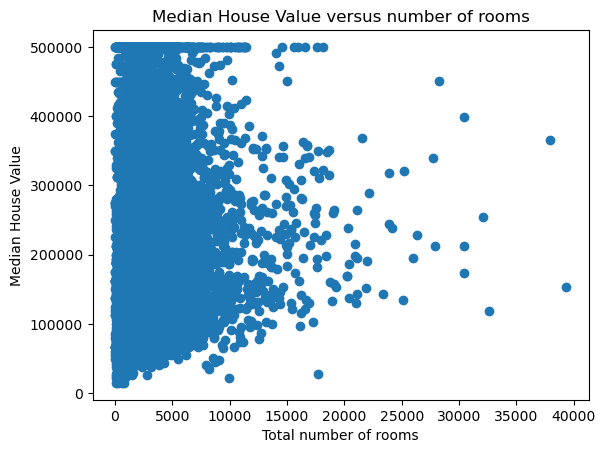

In [82]:
sorted_trimhouse = trimhouse.sort_values(by='total_rooms')
x = sorted_trimhouse['total_rooms']
y = sorted_trimhouse['median_house_value']

fig, ax1 = plt.subplots()
plt.xlabel('Total number of rooms')
plt.ylabel('Median House Value')
plt.title('Median House Value versus number of rooms')
ax1.scatter(x,y)


plt.show()

##### Conclusion: Median House Value and Total number of rooms have no correlation. There are more houses with fewer number of rooms compared to houses with a high value of rooms



#### Are newer houses more expensive than older?

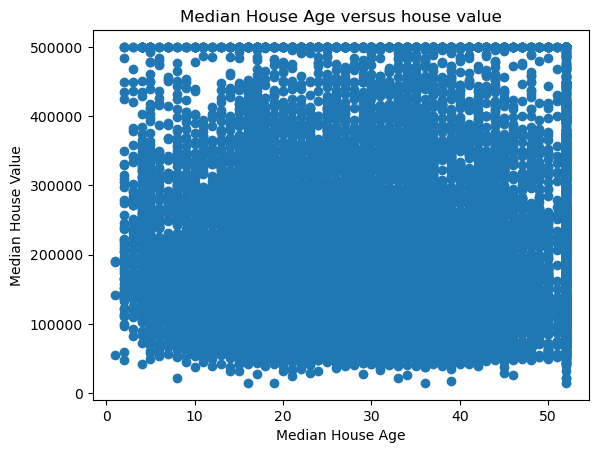

In [80]:
sorted_trimhouse = trimhouse.sort_values(by='housing_median_age')
x = sorted_trimhouse['housing_median_age']
y = sorted_trimhouse['median_house_value']

fig, ax1 = plt.subplots()
ax1.scatter(x,y)
plt.xlabel('Median House Age')
plt.ylabel('Median House Value')
plt.title('Median House Age versus house value')
plt.show()




##### Conclusion: House Value and House Age have no correlation

### Are median income correlated to median house price

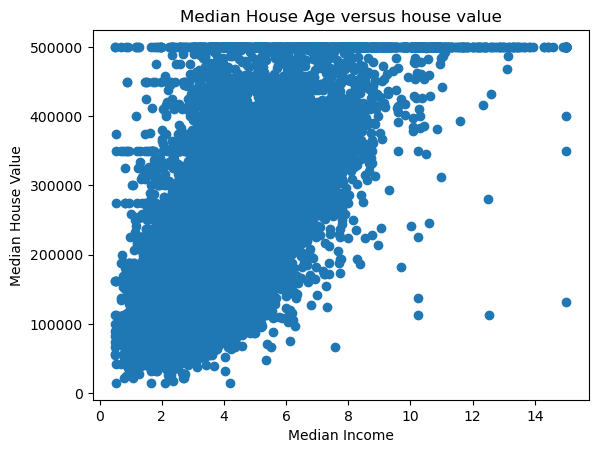

In [107]:
sorted_trimhouse = trimhouse.sort_values(by='median_income')
x = sorted_trimhouse['median_income']
y = sorted_trimhouse['median_house_value']

fig, ax1 = plt.subplots()
ax1.scatter(x,y)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median House Age versus house value')
plt.show()

##### Conclusion: Yes if median income is higher then the median house price is higher

### Are houses that are closer to the ocean more expensive than those that have longer distance to the ocean?

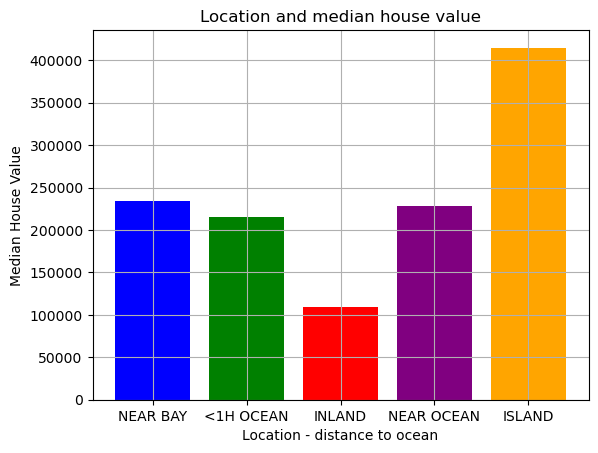

In [126]:

names = trimhouse['ocean_proximity'].unique()
median_values = []

# Loop through each unique value and calculate the median
for value in names:
    median = trimhouse[trimhouse['ocean_proximity'] == value]['median_house_value'].median()
    median_values.append(median)

# Data for bar plot
fruit_data = {'grapes': 22, 'apple': 8, 'orange': 15, 'lemon': 20, 'lime': 25}
nnames = list(fruit_data.keys())
nvalues = list(fruit_data.values())

# Define colors for each bar
colors = ['blue', 'green', 'red', 'purple', 'orange']


fig, ax2 = plt.subplots()
plt.grid(True, zorder=0)
ax2.bar(names,median_values,color=colors)
plt.xlabel('Location - distance to ocean')

plt.ylabel('Median House Value')
plt.title('Location and median house value')

plt.show()

##### Conclusion: Distance to the ocean has significant impact on house value. A house on an island is about 4 times more expensive than an house located in the inland.

## Självutvärdering: 
1. Har något varit utmanande i kunskapskontrollen? Om ja, hur har du hanterat det? 
2. Vilket betyg anser du att du ska ha och varför? 
3. Något du vill lyfta fram till Antonio?

1. Då jag inte har programmerat i Python förut så har jag fått fundera lite över syntaxen - men det har gått bra.
2. Betyg - Gärna VG då jag tagit bort non-nullvalues och analyserat datan på olika sätt, visualiserat och dragit slutsatser
3. Tack för bra kurs - jag har lär mig massor - skönt att vi lär oss grundligt.